In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np




df = pd.read_csv(r'D:\Churn Analysis\Customer Churn.csv')
df.head()




,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Replacing Blank With 0 Tenure Is Zero And No Total Charges Are Recorded

In [5]:
df['TotalCharges']=df['TotalCharges'].replace(" ","0")
df['TotalCharges']=df['TotalCharges'].astype('float')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum().sum()

0

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df['customerID'].duplicated().sum()

0

In [10]:
def conv(value):
    if value==1:
        return "Yes"
    else:
        return "No"
df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)

Converted 0 And 1 Value Of Senior Citizen To Yes/No Make It Easier To UnderStand

In [12]:
df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


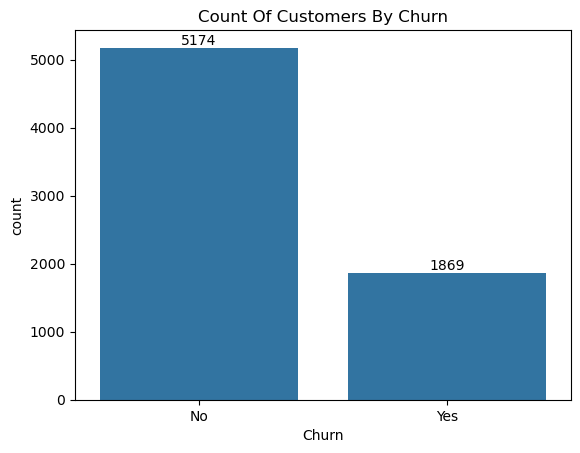

In [13]:
ax=sns.countplot(x='Churn',data=df)

ax.bar_label(ax.containers[0])
plt.title('Count Of Customers By Churn',fontsize=12)
plt.show()

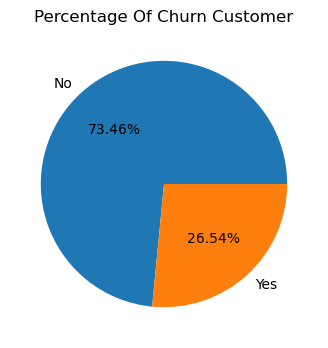

In [14]:
plt.figure(figsize=(5,4))
gb=df.groupby("Churn").agg({'Churn':'count'})
plt.pie(gb['Churn'],labels=gb.index,autopct="%1.2f%%")
plt.title('Percentage Of Churn Customer',fontsize=12)
plt.show()

From The Given  Pie Chart We Can Conclude That 26.54% Of Our Customers Have Churned Out.
Now Let's Explore The Reason Behind It

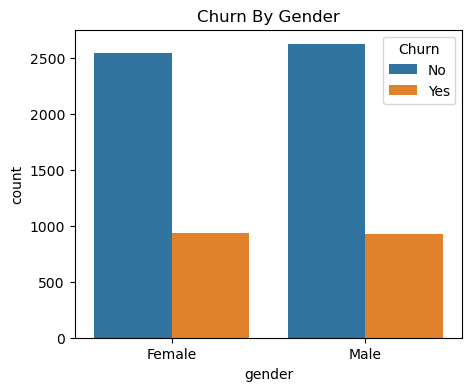

In [16]:
plt.figure(figsize=(5,4))
sns.countplot(x='gender',data=df, hue='Churn')
plt.title('Churn By Gender',fontsize=12)
plt.show()

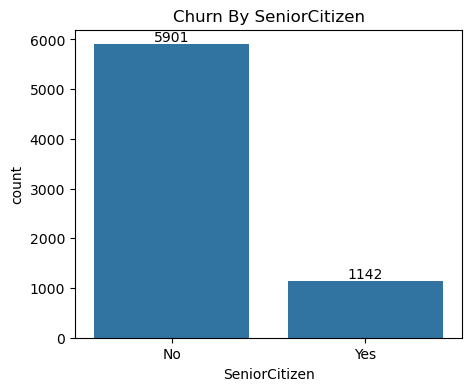

In [64]:
plt.figure(figsize=(5,4))
ax=sns.countplot(x='SeniorCitizen',data=df)
ax.bar_label(ax.containers[0])
plt.title('Churn By SeniorCitizen')
plt.show()   

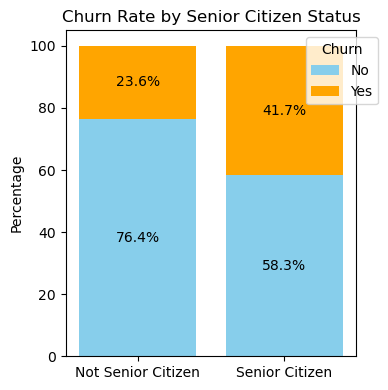

In [98]:
# Step 1: Get percentage data
counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# Step 2: Convert to percentage
percentage = counts.div(counts.sum(axis=1), axis=0) * 100

# Step 3: Plot
fig, ax = plt.subplots(figsize=(4, 4))

bottoms = [0] * len(percentage)

colors = ['skyblue', 'orange']  # You can choose any two colors

for idx, churn_status in enumerate(percentage.columns):
    ax.bar(
        percentage.index,
        percentage[churn_status],
        bottom=bottoms,
        label=churn_status,
        color=colors[idx]
    )
    
    # Add labels
    for i, val in enumerate(percentage[churn_status]):
        ax.text(
            i,
            bottoms[i] + val / 2,
            f'{val:.1f}%',
            ha='center',
            va='center',
            color='black',
            fontsize=10
        )
    
    # Update bottoms
    bottoms = [bottoms[i] + percentage[churn_status].iloc[i] for i in range(len(bottoms))]

# Labels and Title
ax.set_xticks([0, 1])
ax.set_xticklabels(['Not Senior Citizen', 'Senior Citizen'])
ax.set_ylabel('Percentage')
ax.set_title('Churn Rate by Senior Citizen Status')
ax.legend(title='Churn',loc='upper right',bbox_to_anchor=(1.1,1))

plt.tight_layout()
plt.show()


Comperative A Greater Percentage Of  People In  Senior Citizen Category have Churned.

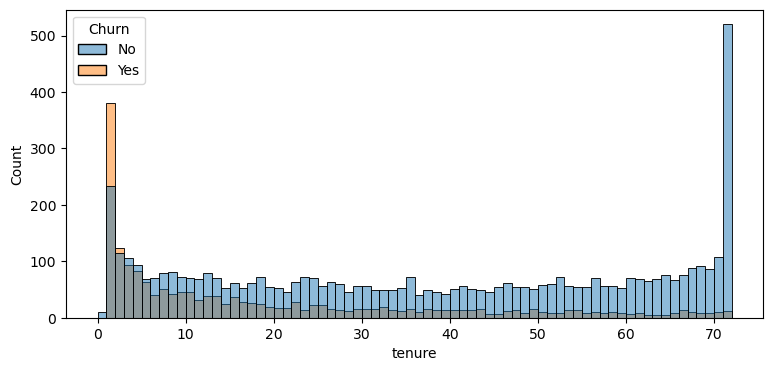

In [106]:
plt.figure(figsize=(9,4))
sns.histplot(x='tenure',data=df,bins=72,hue='Churn')
plt.show()

People Who Have Used Our Service For Long Time Have Stayed And People Who Have Used Our Service #1 Or 2 Months Have Churned

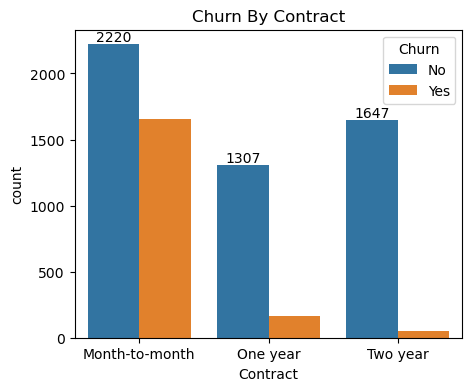

In [110]:
plt.figure(figsize=(5,4))
ax=sns.countplot(x='Contract',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
plt.title('Churn By Contract')
plt.show()  

People Who Have Month To Month Contract Are Likely To Churn To Then From Those Who Have 1 Or 2 Years Contract

In [112]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

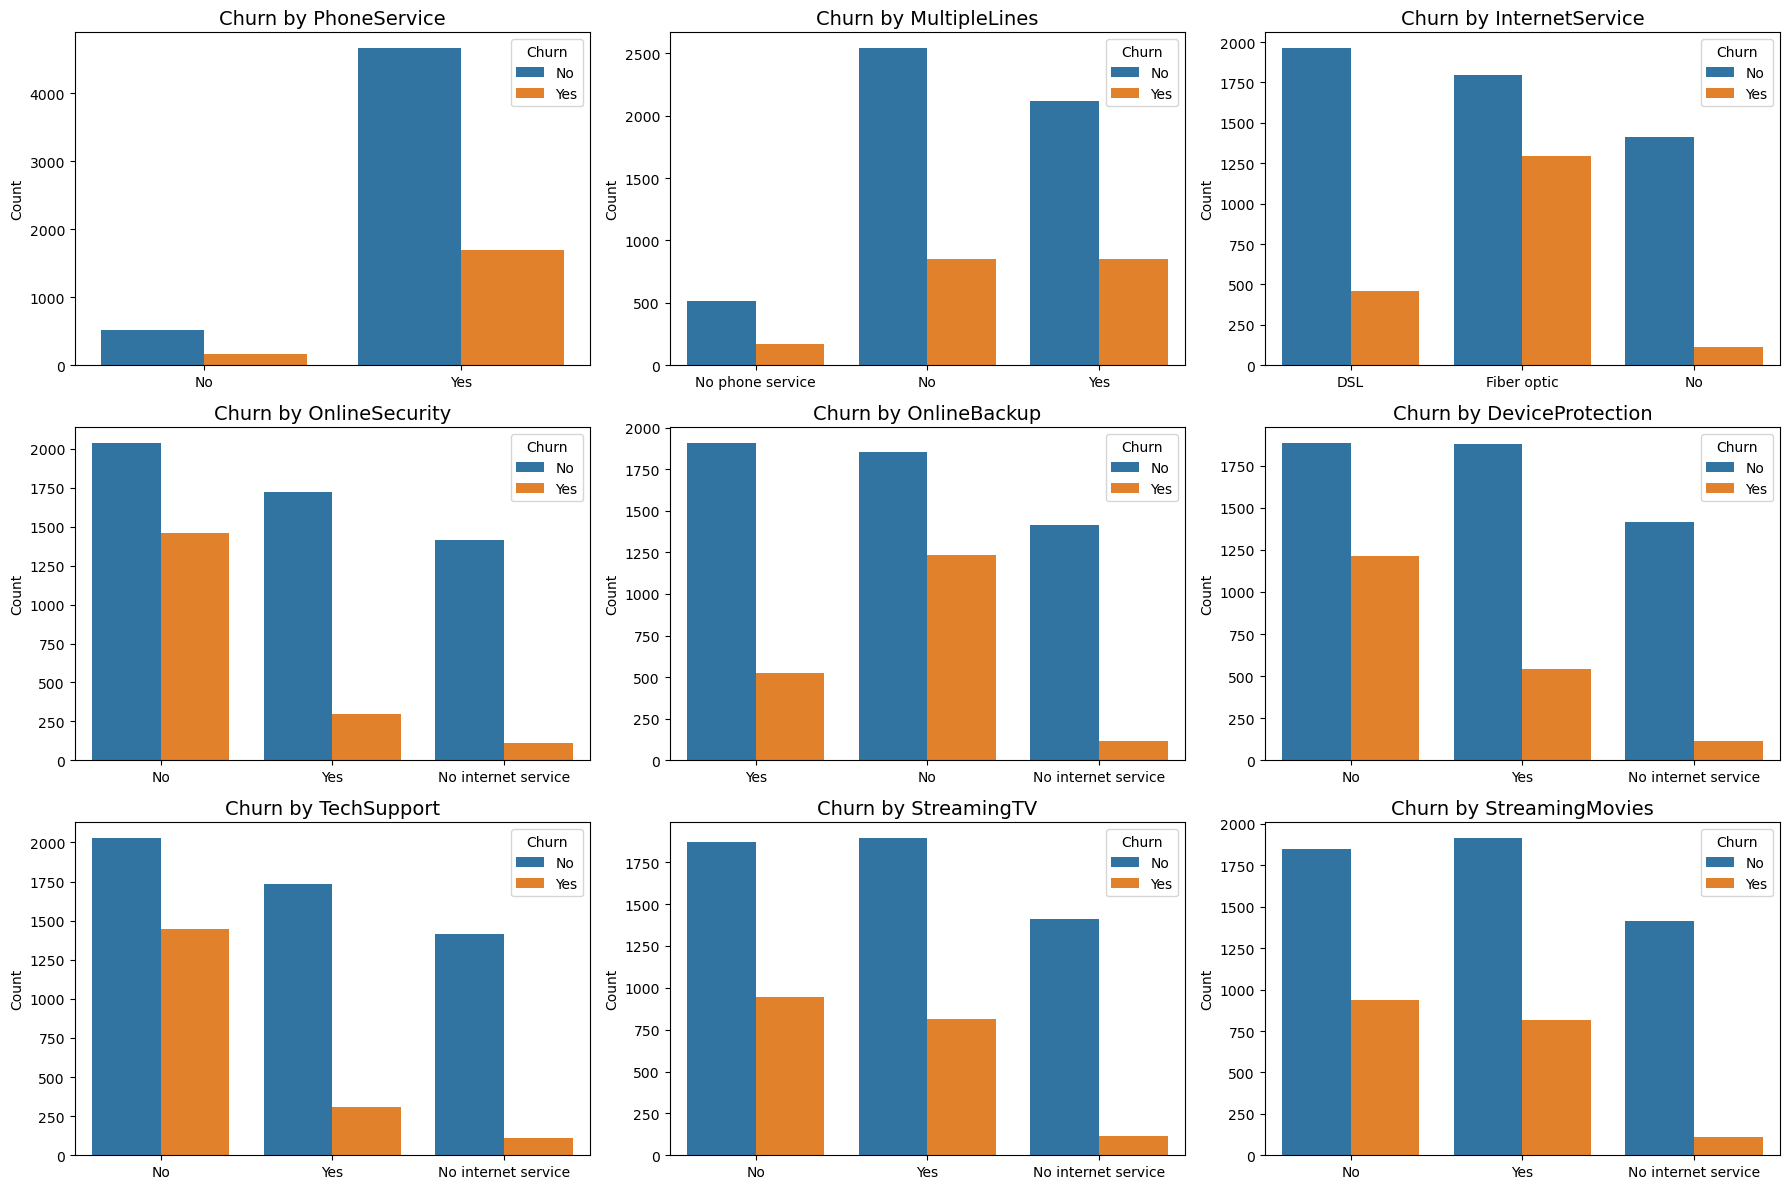

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature columns
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the subplot grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()  # Flatten to easily iterate

# Loop through columns and create countplots
for i, col in enumerate(cols):
    sns.countplot(x=col, hue='Churn', data=df, ax=axes[i])
    axes[i].set_title(f'Churn by {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


This visual represents customer churn patterns across various services. Customers without additional services like OnlineSecurity, TechSupport, or DeviceProtection are more likely to churn. Fiber optic internet users also show a higher churn rate compared to DSL and no internet. Additionally, users with multiple lines, streaming services, and phone service show increased retention, suggesting bundled services may reduce churn.

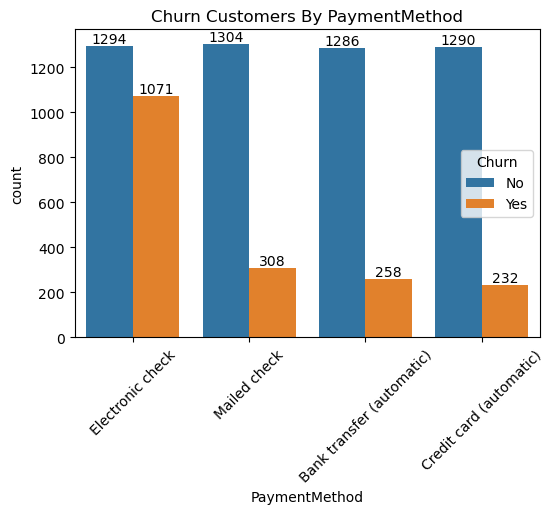

In [127]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x='PaymentMethod',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.title('Churn Customers By PaymentMethod')
plt.xticks(rotation=45)
plt.show() 

Customer Is Likely To Churn When He Is Using Eletronic Check As a Payment Method
